In [ ]:
#installation tensorflow

! pip install -q tensorflow-model-optimization



     |████████████████████████████████| 213 kB 5.4 MB/s 


In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
#@title Importation des Librairies
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import datetime
import os
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
#from keras.optimizers import SGD
from keras.regularizers import l2
from keras.callbacks import Callback, LearningRateScheduler, TensorBoard, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
#from keras.utils import print_summary, to_categorical
from keras import backend as K
import sys
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from skimage import transform
from skimage.transform import rotate, AffineTransform
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage import util
from skimage import exposure
from scipy import ndimage
import seaborn as sns


import matplotlib.pyplot as plt #Plotting framework
import pandas as pd #data analysis
import sklearn
from sklearn import metrics
from skimage import io, color, exposure, transform
from skimage.color import rgb2gray
import cv2
import h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
PATH="/content/drive/MyDrive/Projet_Acceleration_Materielle/data2"
os.chdir(PATH)
!ls

Mounted at /content/drive
dataset			    list_train_images_32_32.npy  Model.h5
list_test_images_32_32.npy  list_train_labels_32_32.npy  yolo.png
list_test_labels_32_32.npy  model


In [ ]:

img_test = np.load("list_test_images_32_32.npy")
label_train = np.load("list_train_labels_32_32.npy")
label_test = np.load("list_test_labels_32_32.npy")
img_train = np.load("list_train_images_32_32.npy")

print(f"Img_train shape : {img_train.shape}")
print(f"Img_test shape : {img_test.shape}")
print(f"Label_train shape : {label_train.shape}")
print(f"Label_test shape : {label_test.shape}")

Img_train shape : (37008, 32, 32, 3)
Img_test shape : (12630, 32, 32, 3)
Label_train shape : (37008,)
Label_test shape : (12630,)


In [ ]:
np.unique(label_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [ ]:
!ls

dataset			    list_train_images_32_32.npy  Model.h5
list_test_images_32_32.npy  list_train_labels_32_32.npy  yolo.png
list_test_labels_32_32.npy  model


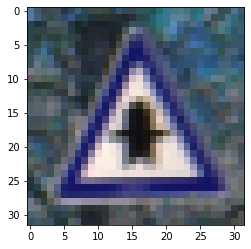

In [ ]:
plt.imshow(img_train[776])

In [ ]:
def convert_rgb2gray(img_array):
  array = []
  for i in range(len(img_array)):
    array.append(skimage.color.rgb2gray(img_array[i]))

  return np.array(array)

In [ ]:
import skimage
def equalize_img(img_array,color = True):
  array = []
  if(color == False):
    for i in range(len(img_array)):
      img2 = img_array[i]
      img2 = img2/img2.max()
      img2 = 255*img2
      array.append(cv2.equalizeHist(img2.astype(np.uint8)))
    return np.array(array)
  else:
    for i in range(len(img_array)):
      img = skimage.color.rgb2hsv(img_array[i])
      #print(img.shape)
      img2 = img[:,:,2]
      #print(img2.dtype)

      img2 = img2/img2.max()
      img2 = 255*img2
      img3  = cv2.equalizeHist(img2.astype(np.uint8))
      #print(img3.shape)
      img[:,:,2] = img3
      array.append(skimage.color.hsv2rgb(img))
    return np.array(array)
  return

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
img_train = scaler.fit_transform(img_train.reshape(-1,1))
img_train.shape
img_train = img_train.reshape(-1,32,32,3)
img_train = (img_train * 255).astype(np.uint8)

scaler2 = MinMaxScaler(feature_range=(0,1))
img_test = scaler2.fit_transform(img_test.reshape(-1,1))
img_test = img_test.reshape(-1,32,32,3)
img_test = (img_test * 255).astype(np.uint8)


print(img_train.shape)
train_x_1 = equalize_img(img_train).astype(np.uint8)
train_x_2 = equalize_img(convert_rgb2gray(img_train),color = False)
train_x_2 = np.stack((train_x_2,)*3,axis = -1)
train_x_3 = img_train.astype(np.uint8)
train_x_4 = convert_rgb2gray( img_train)
train_x_4 = np.stack((train_x_4,)*3,axis = -1)

#x_test3 = np.stack((x_test3,)*3, axis=-1)

test_x = equalize_img(img_test).astype(np.uint8)


(37008, 32, 32, 3)


In [ ]:
train_x = np.concatenate((train_x_1,train_x_2,train_x_3,train_x_4))
train_y = np.concatenate((label_train,label_train,label_train,label_train))

In [ ]:
train_x = train_x_4
train_y = label_train

In [ ]:
IMG_SHAPE = (32,32,3)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape = IMG_SHAPE))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape = IMG_SHAPE))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Conv2D(16,(3,3)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(43))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 16)        4624      
                                                        

In [ ]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(train_x,train_y,
                    epochs=30,
                    validation_split=0.1)

Epoch 1/30
4164/4164 [==============================] - 50s 10ms/step - loss: 2.4792 - accuracy: 0.6942 - val_loss: 4.8455 - val_accuracy: 0.0000e+00
Epoch 2/30
4164/4164 [==============================] - 41s 10ms/step - loss: 1.2247 - accuracy: 0.7906 - val_loss: 4.9106 - val_accuracy: 0.0000e+00
Epoch 3/30
4164/4164 [==============================] - 40s 10ms/step - loss: 1.2692 - accuracy: 0.8194 - val_loss: 4.9913 - val_accuracy: 0.0000e+00
Epoch 4/30
4164/4164 [==============================] - 40s 10ms/step - loss: 1.2985 - accuracy: 0.8381 - val_loss: 5.0776 - val_accuracy: 0.0000e+00
Epoch 5/30
4164/4164 [==============================] - 39s 9ms/step - loss: 1.3653 - accuracy: 0.8461 - val_loss: 5.1179 - val_accuracy: 0.0000e+00
Epoch 6/30
4164/4164 [==============================] - 40s 10ms/step - loss: 1.4210 - accuracy: 0.8554 - val_loss: 5.3121 - val_accuracy: 0.0103
Epoch 7/30
4164/4164 [==============================] - 40s 10ms/step - loss: 1.5222 - accuracy: 0.8625 -

In [ ]:
model.evaluate(test_x,label_test)

395/395 [==============================] - 2s 5ms/step - loss: 11.5686 - accuracy: 0.9306


[11.568602561950684, 0.9306413531303406]

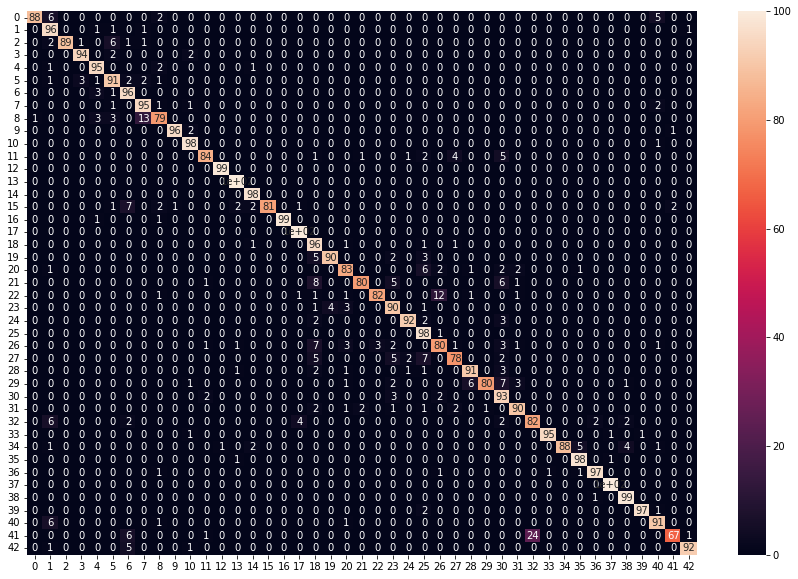

In [ ]:
outputs = model.predict(test_x)
result_classification = np.argmax(outputs,axis= 1)
target= label_test

matrice_confusion = confusion_matrix(result_classification,target)
matrice_confusion = matrice_confusion.astype(np.float32)
#print(np.max(matrice_confusion[0]))
"""
for ligne in matrice_confusion:
  maxi = np.max(ligne)
  for element in ligne:
    element = element/maxi

"""


for i in range(len(matrice_confusion)):
  somme = np.sum(matrice_confusion[i])
  for j in range(len(matrice_confusion[0])):
    if(somme != 0):
      matrice_confusion[i,j] = round(matrice_confusion[i,j] / (somme),2) * 100


plt.figure(figsize=(15,10))

sns.heatmap(matrice_confusion,annot=True)

In [ ]:
matrice_confusion

array([[75.,  4.,  0., ...,  3.,  0.,  0.],
       [ 0., 92.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1., 58., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 92.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 83.,  2.],
       [ 0.,  0.,  0., ...,  1.,  0., 94.]], dtype=float32)

In [ ]:
np.argmax(outputs,axis =)

array([ 1, 18, 18, ..., 30, 25,  2])

In [ ]:
array.shape

(12630, 43)

In [ ]:
model.save('model', save_format= "tf")

INFO:tensorflow:Assets written to: model/assets


In [ ]:
!pip install tf2onnx

     |████████████████████████████████| 435 kB 4.1 MB/s 
     |████████████████████████████████| 12.7 MB 44.2 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0


In [ ]:
!python -m tf2onnx.convert \
        --saved-model model/ \
        --output model/panneau1.onnx \
        --opset 7

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-01-10 10:19:36,534 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-01-10 10:19:37,047 - INFO - Signatures found in model: [serving_default].
2022-01-10 10:19:37,048 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-01-10 10:19:37,048 - INFO - Output names: ['dense_3']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-01-10 10:19:37,178 - WARNING - From /usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py:706: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-01-10 10:19:37,247 - INFO - Using ten

In [ ]:
%cd model

/content/drive/.shortcut-targets-by-id/1ZhwREzTqWyWVd24lvEjetIj_6ZtSoXui/Projet_Acceleration_Materielle/data2/model


--2022-01-10 10:21:56--  http://panneau1.onnx/
Resolving panneau1.onnx (panneau1.onnx)... failed: Name or service not known.
wget: unable to resolve host address ‘panneau1.onnx’


In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1ZhwREzTqWyWVd24lvEjetIj_6ZtSoXui/Projet_Acceleration_Materielle/data2/model


In [ ]:
plt.imshow(img_test[0])
plt.savefig("yolo")

In [ ]:
model.save("Model.h5")

In [ ]:
model.evaluate(img_test,label_test)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:

img = skimage.color.rgb2hsv(img_train[8528])
plt.imshow(img)
      #print(img.shape)
img2 = img[:,:,2]
plt.imshow(img2)
      #print(img2.dtype)
img2 = img2/img2.max()
img2 = 255*img2
img3  = cv2.equalizeHist(img2.astype(np.uint8))
plt.imshow(img3)
      #print(img3.shape)
img[:,:,2] = img3
img = skimage.color.hsv2rgb(img)
plt.imshow(img.astype(np.uint8))

#array.append(skimage.color.hsv2rgb(img))